# Physics 760: Computational Physics
## WS 2022/23
### Week 1
#### Pugazharasu Anancia Devaneyan, Rishi Kumar Senthil Kumar

In [76]:
#setup the notebook
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import math as mth

Populating the interactive namespace from numpy and matplotlib


# Simulating the Ising model in $d=1$ using the Metropolis-Hasting algorithm

First we define what energy difference i.e. $\Delta S$ that was defined in the lecture to be numerically.

In [77]:
def diff_E(J, h, spin, spin_pp, spin_nn):
    delta_E = 2*h*spin + 2*J*spin*(spin_pp+spin_nn)
    return delta_E

Now we implement Metropolis-Hastings algorithm as detailled in the lecture.

In [78]:
def accept_reject(sweeps, N, beta, J, h, freq=10):
    
    
    spin_list = 2*np.random.randint(2, size=N) - 1
    final_config = []
    for i in range(sweeps):
        spin_flip = np.random.randint(N)
        
        spin = spin_list[spin_flip]
        
        spin_nn = spin_list[(spin_flip+1)%N]
        spin_pp = spin_list[(spin_flip-1)%N]

        change_E = diff_E(J,h,spin,spin_pp,spin_nn)
        
        rand = np.random.random()
        # fill in the metropolis critereon, using dE
        if rand<min(1,np.exp(-beta*(change_E))) :
            #flip the spin
            spin_list[spin_flip]*=-1
        else:
            pass
        
        m = spin_list.mean()
        
        if i%freq == 0:
            final_config.append(m)
    
    return final_config

Now we shall calculate the exact solutions to compare the simulation with, the calculations for this are detailed in the neighbouring python notebook.

In [79]:
def exact_magnetization(J_coup,h_coup,Temp,N_sites):
    mag = 0 
    sine_term = mth.sin(h_coup/Temp)
    cosine_term = mth.cos(h_coup/Temp)
    exp_term = mth.exp(J_coup/Temp)
    numerator_first = (N_sites*(((cosine_term - mth.sqrt((sine_term**2)+(exp_term**(-4))))*exp_term)**N_sites)*((sine_term/Temp)-((sine_term*cosine_term)/(Temp*mth.sqrt((sine_term**2)+(exp_term**(-4)))))))/(cosine_term - mth.sqrt((sine_term**2)+(exp_term**(-4))))
    numerator_second = (N_sites*(((cosine_term + mth.sqrt((sine_term**2)+(exp_term**(-4))))*exp_term)**N_sites)*((sine_term/Temp)+((sine_term*cosine_term)/(Temp*mth.sqrt((sine_term**2)+(exp_term**(-4)))))))/(cosine_term + mth.sqrt((sine_term**2)+(exp_term**(-4))))
    denom_first = (((-mth.sqrt((sine_term**2)+(exp_term)**(-4))+cosine_term)*exp_term)**N_sites)
    denom_second = (((mth.sqrt((sine_term**2)+(exp_term)**(-4))+cosine_term)*exp_term)**N_sites)
    mag = (numerator_first + numerator_second)/(denom_first + denom_second)
    return mag

We can calculate the magnetization at the thermodynamic limit by taking the limit $\lim_{N \rightarrow \infty}$ for the previous expression.

In [80]:
def thermo_magnetization(J_coup,h_coup,Temp):
    sine_term = mth.sin(h_coup/Temp)
    cosine_term = mth.cos(h_coup/Temp)
    exp_term = mth.exp(-4*(J_coup/Temp))
    mag = (sine_term + ((sine_term * cosine_term)/(mth.sqrt((sine_term**2)+exp_term))))/(cosine_term + mth.sqrt((sine_term**2)+exp_term))
    return mag

In [81]:
h_input = np.linspace(-1,1,100)
h_fixed = 0.5
N_fixed = 20
N_input = [2,3,4,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
Temp_set = 0.75
J_fixed = 1
sweeps = N_fixed*100
beta = 1/Temp_set

In [82]:
m_thermo_1 = []
m_exact_1 = []
for i in h_input:
    m_thermo_1.append(thermo_magnetization(J_fixed,float(i),Temp_set))
    m_exact_1.append(exact_magnetization(J_fixed,i,Temp_set,N_fixed)/100)

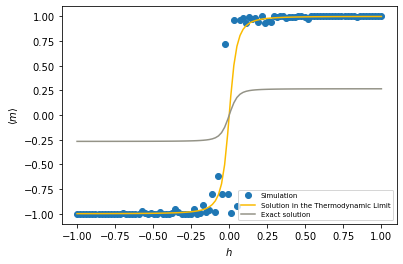

In [83]:
m_vs_h = []
for h in h_input:
    m_h = accept_reject(sweeps, N_fixed, beta, J_fixed,h)
    mean_m = np.mean(m_h[len(m_h)//2:])
    m_vs_h.append(mean_m)


plt.plot(h_input,m_vs_h,marker='o',label="Simulation",linestyle='')
plt.plot(h_input, m_thermo_1, color ='#fbbb00', label='Solution in the Thermodynamic Limit')
plt.plot(h_input, m_exact_1, color = '#949387', label='Exact solution')

plt.xlabel('$h$')
plt.ylabel('$\\langle m \\rangle$')
plt.legend(loc='lower right',prop={'size': 7})
plt.savefig('m_v_h.png')

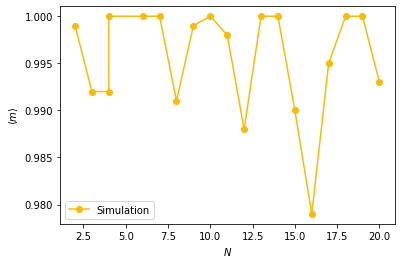

In [84]:
m_vs_n = []
for test_n in N_input:
    m_n = accept_reject(sweeps, N_fixed, beta, J_fixed,h_fixed)
    mean_m_2 = np.mean(m_n[len(m_n)//2:])
    m_vs_n.append(mean_m_2)

plt.plot(N_input,m_vs_n,marker='o', color ='#fbbb00', label="Simulation")
plt.xlabel('$N$')
plt.ylabel('$\\langle m \\rangle$')
plt.legend(loc='lower left')
plt.savefig('m_v_n.png')

# Error estimate

We shall now estimate the error in our simulation by measuring residual standard deviation of our simulation from what we expect in the thermodynamic limit.

In [85]:
error_sum = 0
for value in h_input:
    avg = accept_reject(sweeps, N_fixed, beta, J_fixed,value)
    mean = np.mean(avg[len(avg)//2:])
    error_sum = (thermo_magnetization(J_fixed,value,Temp_set) - mean)**2
error = mth.sqrt(error_sum/(N_fixed-2))
display(error)

0.0006000102693923783